Try out the ability to select only a few rafts from the camera geometry

In [1]:
from __future__ import print_function

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
from lsst.sims.maf.plots import PlotHandler
import healpy as hp

In [2]:
# Set the database and query
database = 'baseline2018a.db'
opsdb = db.OpsimDatabase(database)
outDir = 'Camera'

resultsDb = db.ResultsDb(outDir=outDir)
nside=512

In [3]:
rafts = ['R:0,1', 'R:0,2', 'R:0,3',
         'R:1,0', 'R:1,1', 'R:1,2', 'R:1,3', 'R:1,4',
         'R:2,0', 'R:2,1', 'R:2,2', 'R:2,3', 'R:2,4',
         'R:3,0', 'R:3,1', 'R:3,2', 'R:3,3', 'R:3,4',
         'R:4,1', 'R:4,2', 'R:4,3',
        ]
chips = ['S:0,0', 'S:0,1', 'S:0,2',
        'S:1,0', 'S:1,1', 'S:1,2',
        'S:2,0', 'S:2,1', 'S:2,2']
allChips =[]
for raft in rafts:
    for chip in chips:
        allChips.append(raft+' '+chip)

In [4]:
sqlWhere = \
    'filter = "z" and %s < 59853.018 and fieldRA < %f and ' \
    'fieldDec > %f and fieldDec < 0' % ('observationStartMJD', 306., -25.)
metric = metrics.Coaddm5Metric()
slicer = slicers.HealpixSlicer(nside=nside, useCamera=True, chipNames=allChips)


Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


Querying database SummaryAllProps with constraint filter = "z" and observationStartMJD < 59853.018 and fieldRA < 306.000000 and fieldDec > -25.000000 and fieldDec < 0 for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'rotSkyPos']
Found 1 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "z" and observationStartMJD < 59853.018 and fieldRA < 306.000000 and fieldDec > -25.000000 and fieldDec < 0" constraint now.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/plots/spatialPlotters.py:302: UserWarning: Histogram range was single-valued; expanding default range.
  warnings.warn('Histogram range was single-valued; expanding default range.')
/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:66: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn('Optimal bin calculation calculated NaN: returning %i' %(nbinMax))


monopole: 23.3486  dipole: lon: 135, lat: 8.04947, amp: 4.25662e-07
Plotting complete.


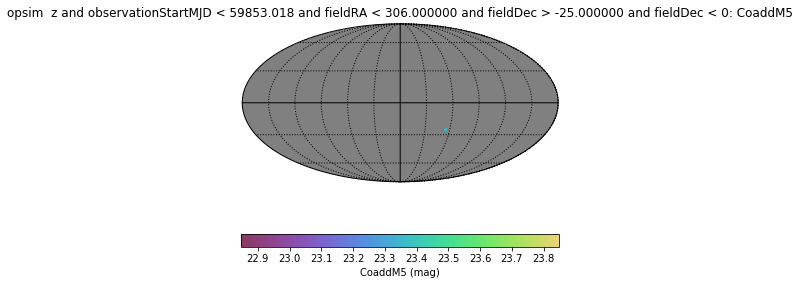

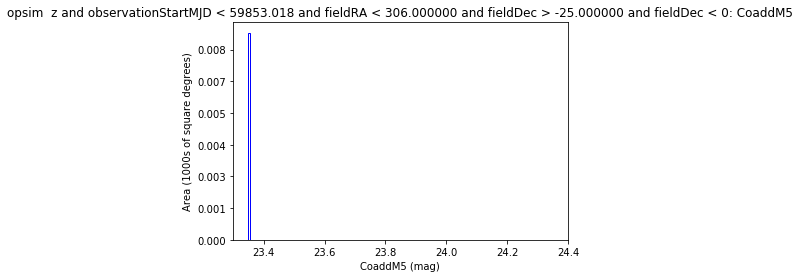

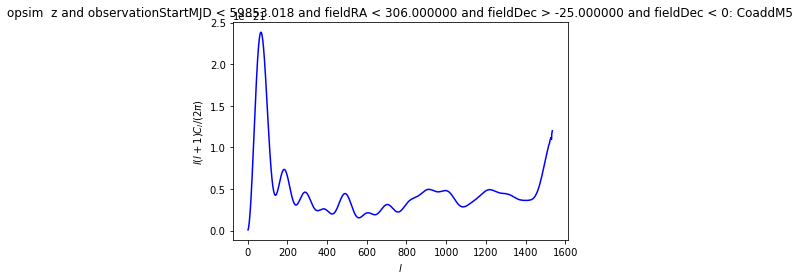

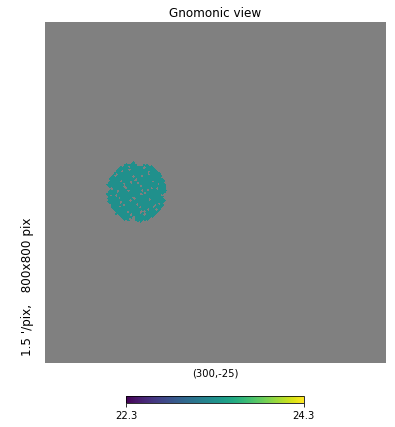

In [5]:
bundle = metricBundles.MetricBundle(metric, slicer, sqlWhere)
bg = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir, 
                                     resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)
hp.gnomview(bundle.metricValues, xsize=800,ysize=800,rot=(300, -25, 0))

In [6]:
# Now let's use every-other chip
halfChips = []
for raft in rafts[0::2]:
    for chip in chips:
        halfChips.append(raft+' '+chip)

In [7]:
slicer = slicers.HealpixSlicer(nside=nside, useCamera=True, chipNames=halfChips)

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


In [ ]:
bundle = metricBundles.MetricBundle(metric, slicer, sqlWhere)
bg = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir, 
                                     resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)
hp.gnomview(bundle.metricValues, xsize=800,ysize=800,rot=(300, -25, 0))

Querying database SummaryAllProps with constraint filter = "z" and observationStartMJD < 59853.018 and fieldRA < 306.000000 and fieldDec > -25.000000 and fieldDec < 0 for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'rotSkyPos']
Found 1 visits
Running:  [0]


I think raft 0,0 is the lower left in this image (there's a slight rotation).  Note that the chip name info is also passed to the metric with the other slicePoint info, so metrics can also use the chip name info if they want to.